In [1]:
import numpy as np
import os
import pandas as pd
from PIL import Image
import cv2
from math import pi, tan
import gist
import xmltodict
import matplotlib.pyplot as plt
from scipy import spatial
import random

In [2]:
PARENT_DIR = '/media/johnkoo/data/stanford-dogs-dataset'

In [3]:
IMAGE_SHAPE = (128, 128)
INIT_FOV_DEG = 70

In [4]:
NBLOCKS = 4

In [5]:
def crop_image(image, ratio, centroid_1, centroid_2, output_size=IMAGE_SHAPE):
    image = np.array(image)
    upper = int(centroid_1 * (1 - RATIO))
    left = int(centroid_2 * (1 - RATIO))
    lower = int(image.shape[0] * RATIO + centroid_1 * (1 - RATIO))
    right = int(image.shape[1] * RATIO + centroid_2 * (1 - RATIO))
    cropped_image = cv2.resize(image[upper:lower, left:right, :], 
                               dsize=output_size)
    return cropped_image

def distance(A, B):
    return spatial.distance.pdist([A, B])

def incremental_farthest_search(points, k):
    # https://flothesof.github.io/farthest-neighbors.html
    orig_ind = list(range(len(points)))
    remaining_points = points[:]
    solution_set = []
    solution_set_indices = []
    l = random.randint(0, len(remaining_points) - 1)
    solution_set.append(remaining_points.pop(l))
    solution_set_indices.append(orig_ind.pop(l))
    for n in range(k-1):
        distances = [distance(p, solution_set[0]) for p in remaining_points]
        for i, p in enumerate(remaining_points):
            for j, s in enumerate(solution_set):
                distances[i] = min(distances[i], distance(p, s))
        l = distances.index(max(distances))
        solution_set.append(remaining_points.pop(l))
        solution_set_indices.append(orig_ind.pop(l))
    return solution_set, solution_set_indices

In [6]:
os.chdir(PARENT_DIR)
meta_df = pd.read_csv('meta.csv')
train_df = meta_df[meta_df.dataset == 'train']
train_df

,Unnamed: 0,label,filename,centroid_1,centroid_2,coverage,dataset
0,0,n02099712-Labrador_retriever,n02099712_5263.jpg,237.0,275.5,0.663354,train
1,1,n02099712-Labrador_retriever,n02099712_7802.jpg,243.5,123.5,0.343824,train
2,2,n02099712-Labrador_retriever,n02099712_6318.jpg,245.5,322.0,0.485216,train
3,3,n02099712-Labrador_retriever,n02099712_5648.jpg,187.5,231.0,0.915093,train
4,4,n02099712-Labrador_retriever,n02099712_6901.jpg,226.5,230.5,0.193892,train
5,5,n02099712-Labrador_retriever,n02099712_365.jpg,215.5,285.5,0.217765,train
6,6,n02099712-Labrador_retriever,n02099712_1200.jpg,324.0,181.0,0.204947,train
7,7,n02099712-Labrador_retriever,n02099712_2501.jpg,202.5,241.5,0.929287,train
8,8,n02099712-Labrador_retriever,n02099712_7533.jpg,211.5,203.0,0.149525,train
9,9,n02099712-Labrador_retriever,n02099712_4965.jpg,154.5,217.0,0.803030,train


In [7]:
meta_dir = os.path.join(PARENT_DIR, 'Annotation')
train_dir = os.path.join(PARENT_DIR, 'train')
image_dir = os.path.join(PARENT_DIR, 'Images')

In [8]:
dogs = np.unique(train_df.label)

In [9]:
for i, dog in enumerate(dogs):
    gist_features = []

    # subset to this dog breed
    dog_df = train_df[train_df.label == dog]

    for file in dog_df.filename:
        # grab the metadata
        os.chdir(os.path.join(meta_dir, dog))
        with open(file.strip('.jpg')) as f:
            bbox = xmltodict.parse(f.read())['annotation']['object']['bndbox']

        # grab the image
        os.chdir(os.path.join(image_dir, dog))
        image = np.array(Image.open(file))

        # crop to bounding box
        cropped_image = image[int(bbox['ymin']):int(bbox['ymax']), 
                              int(bbox['xmin']):int(bbox['xmax']), 
                              0:3]

        # extract GIST features
        g = gist.extract(cropped_image, nblocks=NBLOCKS)
        gist_features.append(g)

    # determine which are diverse and which are similar
    _, diverse_ind = incremental_farthest_search(gist_features, int(dog_df.shape[0] / 2))
    similar_ind = [j for j in list(range(dog_df.shape[0])) if j not in set(diverse_ind)]
    if i == 0:
        diverse_df = dog_df.iloc[diverse_ind, ]
        similar_df = dog_df.iloc[similar_ind, ]
    else:
        diverse_df = diverse_df.append(dog_df.iloc[diverse_ind, ])
        similar_df = similar_df.append(dog_df.iloc[similar_ind, ])
    print(str(i) + ' ' + dog + ' done')

0 n02085620-Chihuahua done
1 n02085782-Japanese_spaniel done
2 n02085936-Maltese_dog done
3 n02086079-Pekinese done
4 n02086240-Shih-Tzu done
5 n02086646-Blenheim_spaniel done
6 n02086910-papillon done
7 n02087046-toy_terrier done
8 n02087394-Rhodesian_ridgeback done
9 n02088094-Afghan_hound done
10 n02088238-basset done
11 n02088364-beagle done
12 n02088466-bloodhound done
13 n02088632-bluetick done
14 n02089078-black-and-tan_coonhound done
15 n02089867-Walker_hound done
16 n02089973-English_foxhound done
17 n02090379-redbone done
18 n02090622-borzoi done
19 n02090721-Irish_wolfhound done
20 n02091032-Italian_greyhound done
21 n02091134-whippet done
22 n02091244-Ibizan_hound done
23 n02091467-Norwegian_elkhound done
24 n02091635-otterhound done
25 n02091831-Saluki done
26 n02092002-Scottish_deerhound done
27 n02092339-Weimaraner done
28 n02093256-Staffordshire_bullterrier done
29 n02093428-American_Staffordshire_terrier done
30 n02093647-Bedlington_terrier done
31 n02093754-Border_ter

In [10]:
diverse_df.to_csv(PARENT_DIR + '/diverse.csv')
similar_df.to_csv(PARENT_DIR + '/similar.csv')

In [11]:
print(diverse_df.shape)
print(similar_df.shape)
diverse_df.iloc[50,]

(6000, 7)
(6000, 7)


Unnamed: 0                           901
label         n02085782-Japanese_spaniel
filename              n02085782_4458.jpg
centroid_1                           137
centroid_2                           174
coverage                        0.453734
dataset                            train
Name: 901, dtype: object

In [12]:
for NEW_ANGLE_DEG in [30, 40, 50, 60, 70]:
    INIT_FOV = INIT_FOV_DEG * pi / 180
    NEW_ANGLE = NEW_ANGLE_DEG * pi / 180
    RATIO =  tan(NEW_ANGLE / 2) / tan(INIT_FOV / 2)

    diverse_images = []
    diverse_labels = []
    similar_images = []
    similar_labels = []
    
    for dog in dogs:
        tmp_diverse_df = diverse_df[diverse_df.label == dog]
        tmp_similar_df = similar_df[similar_df.label == dog]
        os.chdir(os.path.join(image_dir, dog))

        # iterate through diverse images
        for i, file in enumerate(tmp_diverse_df.filename):
            image = Image.open(file)
            cropped_image = crop_image(image, RATIO, 
                                       tmp_diverse_df.centroid_1.iloc[i], 
                                       tmp_diverse_df.centroid_2.iloc[i])[:, :, 0:3]
            diverse_images.append(cropped_image)
            diverse_labels.append(dog)
        # iterate through similar images
        for i, file in enumerate(tmp_similar_df.filename):
            image = Image.open(file)
            cropped_image = crop_image(image, RATIO, 
                                       tmp_similar_df.centroid_1.iloc[i], 
                                       tmp_similar_df.centroid_2.iloc[i])[:, :, 0:3]
            similar_images.append(cropped_image)
            similar_labels.append(dog)

    # reshape the data
    diverse_images = np.stack(diverse_images)
    diverse_labels = np.array(diverse_labels)
    similar_images = np.stack(similar_images)
    similar_labels = np.stack(similar_labels)

    os.chdir(PARENT_DIR)
    if str('train') not in os.listdir():
        os.mkdir('train')
    os.chdir('train')
    if str(NEW_ANGLE_DEG) not in os.listdir():
        os.mkdir(str(NEW_ANGLE_DEG))
    os.chdir(str(NEW_ANGLE_DEG))
    np.save('./diverse-images.npy', diverse_images)
    np.save('./diverse-labels.npy', diverse_labels)
    np.save('./similar-images.npy', similar_images)
    np.save('./similar-labels.npy', similar_labels)

In [9]:
dog = dogs[1]
print(dog)
os.chdir(meta_dir)
os.chdir(dog)

n02085782-Japanese_spaniel


In [ ]:
file = os.listdir()[0] + '.jpg'
file

In [ ]:
with open(file.strip('.jpg')) as f:
    bbox = xmltodict.parse(f.read())['annotation']['object']['bndbox']

In [ ]:
bbox

In [ ]:
os.chdir(image_dir)
os.chdir(dog)

In [ ]:
image = np.array(Image.open(file))

In [ ]:
plt.imshow(image)

In [ ]:
cropped_image = image[int(bbox['ymin']):int(bbox['ymax']), int(bbox['xmin']):int(bbox['xmax']), :]

In [ ]:
plt.imshow(cropped_image)

In [ ]:
os.path.join(image_dir, dog, file)

In [ ]:
gist.extract(cropped_image)

In [ ]:
gist.extract(cropped_image).shape

In [ ]:
dog_df = train_df[train_df.label == dog]

In [ ]:
dog_df.shape

In [ ]:
dogs.shape

In [10]:
gist_features = []

# subset to this dog breed
dog_df = train_df[train_df.label == dog]

for i, file in enumerate(dog_df.filename):
    # grab the metadata
    os.chdir(meta_dir)
    os.chdir(dog)
    with open(file.strip('.jpg')) as f:
        bbox = xmltodict.parse(f.read())['annotation']['object']['bndbox']

    # grab the image
    os.chdir(image_dir)
    os.chdir(dog)
    image = np.array(Image.open(file))

    # crop to bounding box
    cropped_image = image[int(bbox['ymin']):int(bbox['ymax']), 
                          int(bbox['xmin']):int(bbox['xmax']), 
                          :]
    g = gist.extract(cropped_image, NBLOCKS)
    gist_features.append(g)
_, diverse_ind = incremental_farthest_search(gist_features, int(dog_df.shape[0] / 2))
similar_ind = [i for i in list(range(100)) if i not in set(diverse_ind)]

In [11]:
print(diverse_ind)
print(similar_ind)

[48, 58, 10, 35, 83, 28, 0, 54, 78, 86, 38, 90, 39, 66, 95, 51, 81, 93, 98, 53, 25, 64, 32, 94, 40, 41, 57, 13, 11, 67, 42, 27, 26, 80, 96, 14, 3, 61, 22, 5, 75, 88, 76, 29, 60, 59, 8, 43, 4, 36]
[1, 2, 6, 7, 9, 12, 15, 16, 17, 18, 19, 20, 21, 23, 24, 30, 31, 33, 34, 37, 44, 45, 46, 47, 49, 50, 52, 55, 56, 62, 63, 65, 68, 69, 70, 71, 72, 73, 74, 77, 79, 82, 84, 85, 87, 89, 91, 92, 97, 99]


In [15]:
gist_features[0].shape

(960,)

In [18]:
gist_features = np.stack(gist_features)

In [19]:
from sklearn.manifold import Isomap

In [20]:
low_dim = Isomap(n_neighbors=10, n_components=2)

In [21]:
X = low_dim.fit_transform(gist_features)

In [22]:
import seaborn as sns

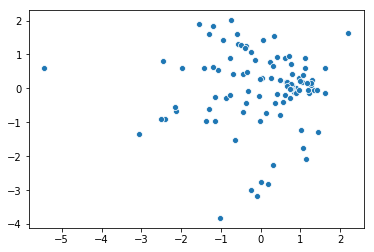

In [23]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])

In [26]:
ds = []
for i in range(gist_features.shape[0]):
    if i in diverse_ind:
        ds.append('diverse')
    elif i in similar_ind:
        ds.append('similar')
    else:
        print('fail')
        

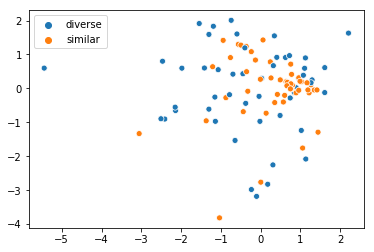

In [27]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=ds)